# Regression Problem: House Sales in King County, USA

King County is located in the U.S. state of Washington and is one of the most populous counties in the country. It encompasses a diverse range of landscapes, including urban areas, suburban neighborhoods, rural communities, and vast natural reserves. At its core is the city of Seattle, one of the major economic and cultural hubs of the Pacific Northwest.

The dataset contains house sale prices for King County. It includes homes sold between May 2014 and May 2015. Our task is to predict the price of house given it's attibutes.

### Data column defination - 

**id** - Unique ID for each home sold<br>
**date** - Date of the home sale<br>
**price** - Price of each home sold (scale = 1e5. For eg - 1.2 means $120000)<br>
**bedrooms** - Number of bedrooms<br>
**bathrooms** - Number of bathrooms, where .5 accounts for a room with a toilet but no shower<br>
**sqft_living** - Square footage of the apartments interior living space<br>
**sqft_lot** - Square footage of the land space<br>
**floors** - Number of floors<br>
**waterfront** - A dummy variable for whether the apartment was overlooking the waterfront or not<br>
**view** - An index from 0 to 4 of how good the view of the property was<br>
**condition** - An index from 1 to 5 on the condition of the apartment<br>
**grade** - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design<br>
**sqft_above** - The square footage of the interior housing space that is above ground level<br>
**sqft_basement** - The square footage of the interior housing space that is below ground level<br>
**yr_built** - The year the house was initially built<br>
**yr_renovated** - The year of the house’s last renovation<br>
**zipcode** - What zipcode area the house is in<br>
**lat** - Lattitude<br>
**long** - Longitude<br>
**sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors<br>
**sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors<br>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import warnings as ws
ws.filterwarnings("ignore")

## Load Dataset

In [2]:
train_df = pd.read_csv('dataset/train.csv')
test_df = pd.read_csv('dataset/test.csv')

# Questions
**Instructions:**
1.  Answer all questions.
2.  Justify your answers with appropriate reasoning, code, or calculations.
3.  Ensure your code is well-commented to explain your logic.
4.  Total Marks: 100

## Question 1: Data Analysis (10 points)

Explore the data to find any relationship between the target variable and the input variables. 

Start with providing some descriptive statistics of the data with visualizations. 

Are there any missing values? Are there any outliers? What is the relationship between the input variables and the target variable. Show some statistical plots to get some insights about the relationship between data attributes and the data attibutes with the label. 

In [3]:
# Provide descriptive statistics of the data
descriptive_stats = train_df.describe()

# Descriptive statistics and missing values
descriptive_stats

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,1.945100e+04,19451.000000,19451.000000,18857.000000,1.945100e+04,19451.000000,19451.000000,18478.000000,19451.000000,18078.000000,19451.000000,19451.000000,19451.000000,19451.000000,19451.000000,19451.000000,19451.000000,19451.000000,19451.000000,19451.000000
mean,4.579305e+09,3.374891,2.117115,2083.822824,1.526233e+04,1.496607,0.007609,0.233792,3.408308,7.656710,1791.785050,291.871112,1971.067297,85.569482,98077.921289,47.559796,-122.214411,1987.574726,12847.165544,5.404026
std,2.876637e+09,0.931878,0.770603,921.655939,4.246746e+04,0.540055,0.086899,0.764109,0.650853,1.174811,831.295886,442.540100,29.355603,404.311212,53.541892,0.138688,0.140509,686.225019,27492.540347,3.686557
min,1.000102e+06,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.519000,399.000000,651.000000,0.750000
25%,2.124084e+09,3.000000,1.750000,1430.000000,5.043000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.469500,-122.329000,1490.000000,5100.000000,3.210000
50%,3.904921e+09,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.231000,1840.000000,7620.000000,4.500000
75%,7.304801e+09,4.000000,2.500000,2550.000000,1.071800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,560.000000,1997.000000,0.000000,98118.000000,47.677700,-122.126000,2360.000000,10087.000000,6.450000
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,77.000000


The **descriptive statistics** provide an overview of the data, highlighting several key points:

- **Count**: There are 19,451 entries in the dataset, with varying counts for some columns due to missing values.
- **Mean and Standard Deviation**: The data has wide-ranging values, for instance, the average living space (sqft_living) is approximately 2,084 square feet with a standard deviation of 921.66, indicating a varied dataset.
- **Min and Max**: The dataset includes a broad spectrum of houses, from those with no bedrooms or bathrooms to properties with up to 33 bedrooms and 8 bathrooms. Living space ranges from 290 to 13,540 square feet, and lot sizes extend up to over 1.65 million square feet.
- **Quartiles**: The 25th, 50th (median), and 75th percentiles give insights into the distribution of data, such as most houses having 3 to 4 bedrooms and 1.75 to 2.5 bathrooms, indicating that typical properties in the dataset are family homes.

In [4]:
# Check for missing values
missing_values = train_df.isnull().sum()

missing_values

id                  0
date              758
bedrooms            0
bathrooms           0
sqft_living       594
sqft_lot            0
floors              0
waterfront          0
view              973
condition           0
grade            1373
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
price               0
dtype: int64

Regarding **missing values**, the dataset has several columns with missing data:
- **sqft_living**: 594 missing values
- **view**: 973 missing values
- **grade**: 1,373 missing values
- **date**: 758 missing values

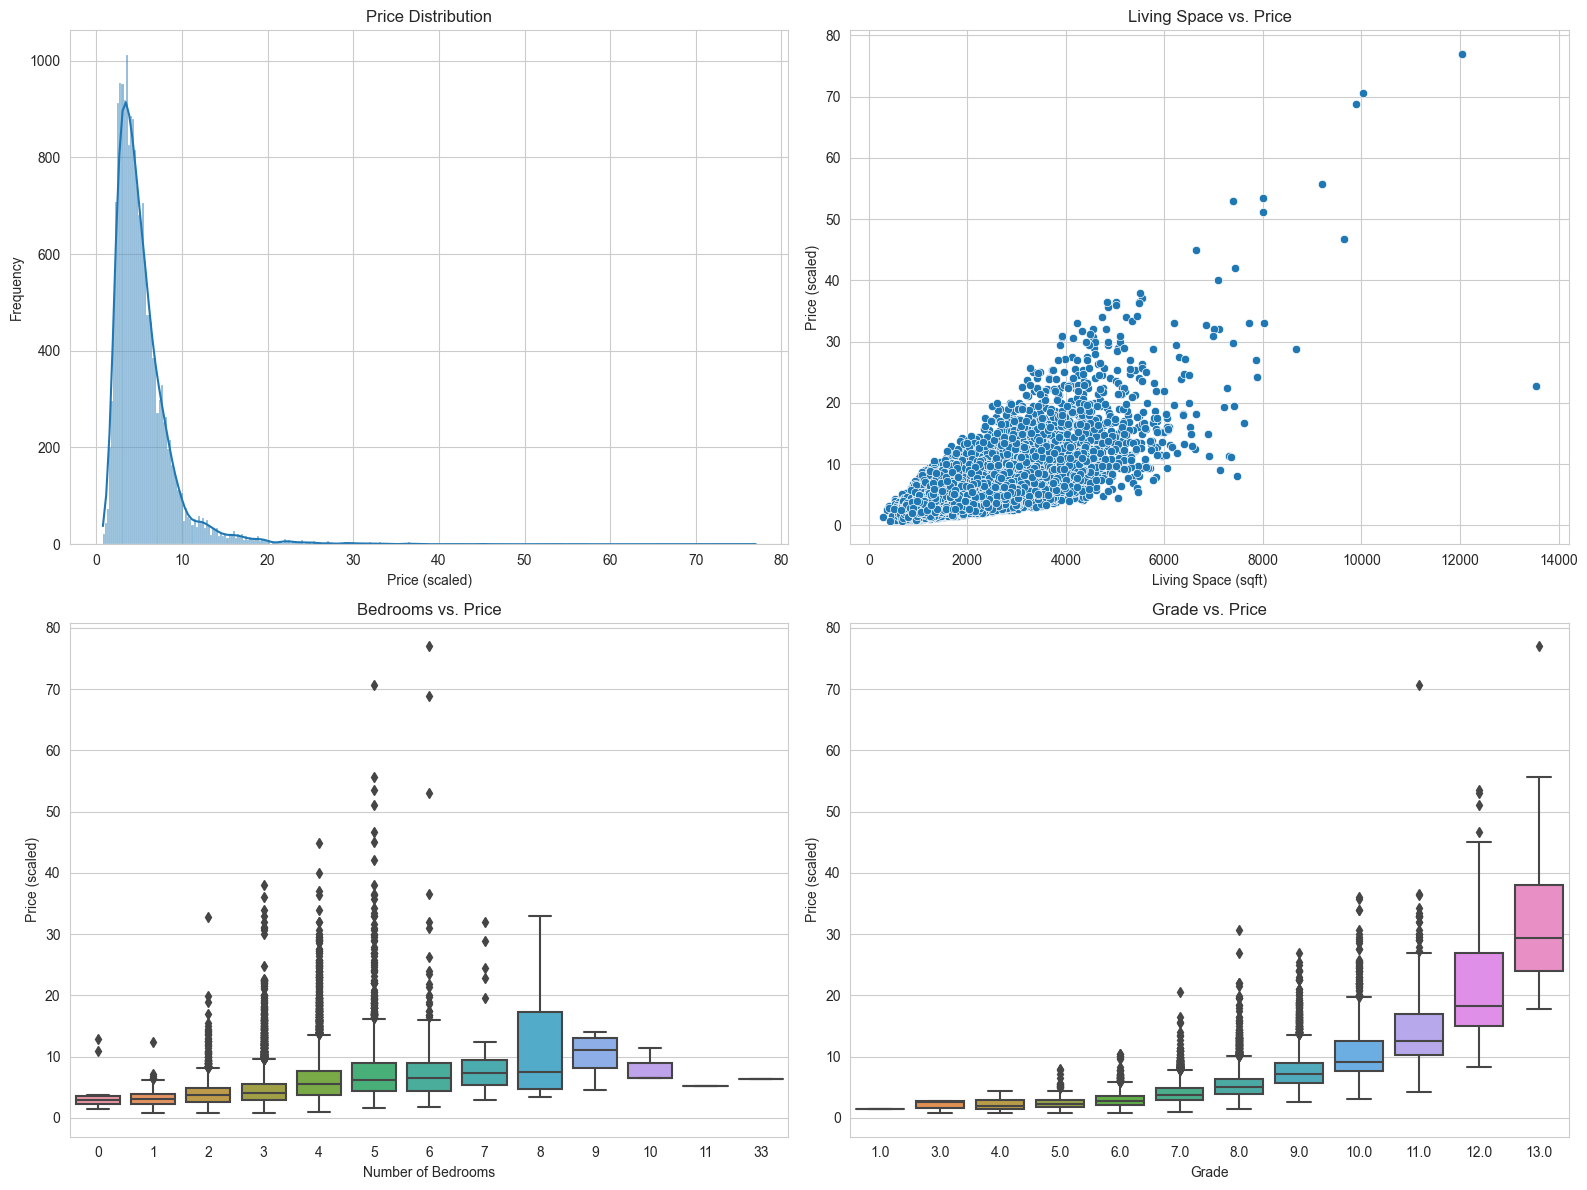

In [5]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure and a set of subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Price Distribution
sns.histplot(train_df['price'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Price Distribution')
axs[0, 0].set_xlabel('Price (scaled)')
axs[0, 0].set_ylabel('Frequency')

# Living Space vs. Price
sns.scatterplot(x='sqft_living', y='price', data=train_df, ax=axs[0, 1])
axs[0, 1].set_title('Living Space vs. Price')
axs[0, 1].set_xlabel('Living Space (sqft)')
axs[0, 1].set_ylabel('Price (scaled)')

# Bedrooms vs. Price
sns.boxplot(x='bedrooms', y='price', data=train_df, ax=axs[1, 0])
axs[1, 0].set_title('Bedrooms vs. Price')
axs[1, 0].set_xlabel('Number of Bedrooms')
axs[1, 0].set_ylabel('Price (scaled)')

# Grade vs. Price
sns.boxplot(x='grade', y='price', data=train_df, ax=axs[1, 1])
axs[1, 1].set_title('Grade vs. Price')
axs[1, 1].set_xlabel('Grade')
axs[1, 1].set_ylabel('Price (scaled)')

plt.tight_layout()

The visualizations provide valuable insights into the relationship between various features and the price, as well as the distribution of the data:

- **Price Distribution**: The price distribution is right-skewed, indicating that while most homes are in the lower to mid-price range, there are a significant number of high-value outliers.
- **Living Space vs. Price**: There's a positive correlation between living space (sqft_living) and price. Larger homes tend to be more expensive, but there are outliers, especially at the higher end of the living space spectrum.
- **Bedrooms vs. Price**: The price tends to increase with the number of bedrooms, up to a point. Homes with a very high number of bedrooms (e.g., more than 9) show a wide range of prices, suggesting that the number of bedrooms alone does not determine price. There are outliers, particularly with homes that have an unusually high number of bedrooms for their price range.
- **Grade vs. Price**: There's a strong positive correlation between the grade of a house and its price. Higher grade homes, which indicate better construction and design quality, command higher prices. The relationship appears to be almost exponential, with premium grades (11-13) showing a significant increase in price variability and overall higher prices.

## Question 2: Data pre-processing & Feature Engineering (20 points)

After getting some insights about the relationships through the EDA process, now move on to clean and preprocess the data. 

How are you going to deal with the missing values? How are you going to deal with the numerical and categorical columns? Are all the attributes relevant? Does any feature need to be reengineered?

In [6]:
# Drop irrelevant features
train_df_cleaned = train_df.drop(['id'], axis=1)

In [7]:
# Handling missing values
# For numerical columns, we'll impute missing values with the median
# For the 'view' and 'grade' columns, also use median imputation as they are ordinal but have missing values
num_imputer = SimpleImputer(strategy='median')
train_df_cleaned['sqft_living'] = num_imputer.fit_transform(train_df_cleaned[['sqft_living']])
train_df_cleaned['view'] = num_imputer.fit_transform(train_df_cleaned[['view']])
train_df_cleaned['grade'] = num_imputer.fit_transform(train_df_cleaned[['grade']])

# Since 'date' might be important for temporal trends, extract year and month and then drop the original date column
train_df_cleaned['sale_year'] = pd.to_datetime(train_df_cleaned['date'], errors='coerce').dt.year
train_df_cleaned['sale_month'] = pd.to_datetime(train_df_cleaned['date'], errors='coerce').dt.month
train_df_cleaned.drop(['date'], axis=1, inplace=True)

In [8]:
# Feature Engineering
# Calculate the age of the house and the years since the last renovation
current_year = pd.to_datetime('today').year
train_df_cleaned['house_age'] = current_year - train_df_cleaned['yr_built']
train_df_cleaned['years_since_renovation'] = np.where(train_df_cleaned['yr_renovated'] == 0, 0,
                                                      current_year - train_df_cleaned['yr_renovated'])
# Drop original year columns
train_df_cleaned.drop(['yr_built', 'yr_renovated'], axis=1, inplace=True)

# Confirm changes and check for remaining missing values
train_df_cleaned.isnull().sum(), train_df_cleaned.head()

(bedrooms                    0
 bathrooms                   0
 sqft_living                 0
 sqft_lot                    0
 floors                      0
 waterfront                  0
 view                        0
 condition                   0
 grade                       0
 sqft_above                  0
 sqft_basement               0
 zipcode                     0
 lat                         0
 long                        0
 sqft_living15               0
 sqft_lot15                  0
 price                       0
 sale_year                 758
 sale_month                758
 house_age                   0
 years_since_renovation      0
 dtype: int64,
    bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
 0         3       1.00       1220.0      4800     1.0           0   0.0   
 1         4       2.50       3170.0     94855     1.0           0   0.0   
 2         5       3.00       2710.0      4200     2.0           0   0.0   
 3         4       2.25       

**Summary** of the steps taken:

1. **Dropped irrelevant feature**: The `id` column was removed as it's not relevant for predicting house prices.
2. **Handled missing values**: Missing values in `sqft_living`, `view`, and `grade` were imputed with the median of their respective columns. This approach preserves the distribution of the data while dealing with missing values effectively.
3. **Feature engineering**:
   - Extracted `sale_year` and `sale_month` from the `date` column to capture potential seasonal trends in house prices and then dropped the original `date` column.
   - Calculated `house_age` as the difference between the current year and `yr_built`, and `years_since_renovation` as the difference between the current year and `yr_renovated`, replacing the original year features with these more informative metrics.

The dataset still has missing values in `sale_year` and `sale_month`, likely due to errors in the `date` column or entries without a sale date.

In [9]:
# Impute missing values for 'sale_year' and 'sale_month' with their respective modes (most common value)
mode_imputer = SimpleImputer(strategy='most_frequent')
train_df_cleaned['sale_year'] = mode_imputer.fit_transform(train_df_cleaned[['sale_year']])
train_df_cleaned['sale_month'] = mode_imputer.fit_transform(train_df_cleaned[['sale_month']])

In [10]:
# Prepare for scaling and encoding
# Identify numerical and categorical columns
numerical_cols = train_df_cleaned.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = ['zipcode']  # Treating zipcode as categorical for encoding

# Remove target variable from numerical columns list
numerical_cols.remove('price')

In [11]:
# Scaling numerical features
scaler = StandardScaler()
train_df_cleaned[numerical_cols] = scaler.fit_transform(train_df_cleaned[numerical_cols])

In [12]:
# Encoding categorical features - Using OneHotEncoder for 'zipcode'
# Given the high cardinality, this approach may result in a large number of columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_zipcode = encoder.fit_transform(train_df_cleaned[categorical_cols])
# Create a DataFrame with encoded zipcode features
encoded_zipcode_df = pd.DataFrame(encoded_zipcode, columns=[f"zipcode_{i}" for i in range(encoded_zipcode.shape[1])], index=train_df_cleaned.index)

In [13]:
# Drop the original 'zipcode' column and concatenate the encoded zipcode DataFrame
train_df_cleaned.drop(['zipcode'], axis=1, inplace=True)
train_df_processed = pd.concat([train_df_cleaned, encoded_zipcode_df], axis=1)

In [14]:
train_df_processed.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zipcode_60,zipcode_61,zipcode_62,zipcode_63,zipcode_64,zipcode_65,zipcode_66,zipcode_67,zipcode_68,zipcode_69
0,-0.402307,-1.449701,-0.945954,-0.246367,-0.919572,-0.087563,-0.297528,-0.627359,-1.406447,-0.687841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.670823,0.496877,1.201889,1.874252,-0.919572,-0.087563,-0.297528,0.909125,1.213685,0.142209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.743953,1.145737,0.695218,-0.260496,0.932138,-0.087563,-0.297528,-0.627359,-0.533070,0.118150,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.670823,0.172448,0.849422,-0.183894,0.932138,-0.087563,-0.297528,-0.627359,1.213685,1.273003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.402307,0.496877,0.320723,-0.147466,-0.919572,-0.087563,3.721368,0.909125,0.340308,-0.266801,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
train_df_processed.isnull().sum().sum()

0

**Summary** of the final steps taken:

1. **Missing Values**: The missing values in `sale_year` and `sale_month` were imputed with the most frequent values, addressing all missing data in the dataset.
2. **Feature Scaling**: Numerical features were standardized using the Standard Scaler. This scaling ensures that all numerical features contribute equally to the model, preventing features with larger scales from dominating those with smaller scales.
3. **Categorical Encoding**: The `zipcode` column was treated as a categorical variable and one-hot encoded, generating a separate column for each unique zipcode. This encoding transforms the categorical data into a format that can be provided to ML algorithms to do a better job in prediction.
4. **Final Dataset**: The final processed dataset now includes scaled numerical features, encoded categorical features, and engineered features. There are 90 columns, including the target variable (`price`) and the encoded zipcode features.

## Question 3 - Modeling (20 points)

Now, it's time to do some modeling. Show the modeling techniques you have used to predict the price of the house sold given the data attributes. Some of the necessary things you need to remember are - <br>

1) Use RMSE as the evaluation metric.<br>
2) Report the 5CV validation score for each model you create.<br>

In [16]:
# Splitting features and target variable
X = train_df_processed.drop('price', axis=1)
y = train_df_processed['price']

In [17]:
# Define RMSE scorer
rmse_scorer = make_scorer(mean_squared_error, squared=False)

In [18]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(n_estimators=10, random_state=42)
}

In [19]:
# Perform 5-fold cross-validation and report RMSE
cv_scores = {}

for name, model in models.items():
    cv_score = cross_val_score(model, X, y, cv=5, scoring=rmse_scorer)
    cv_scores[name] = cv_score

cv_scores

{'Linear Regression': array([1.66344876, 1.53336948, 1.91044906, 1.53800951, 1.56185214]),
 'Ridge Regression': array([1.66471187, 1.53341867, 1.9087842 , 1.53946277, 1.56165637]),
 'Random Forest': array([1.45843354, 1.45213078, 1.57468882, 1.32250138, 1.37628175])}

The approach provided the 5-fold cross-validation RMSE scores for three different models. Here's a summary of the results:

1. **Linear Regression** yielded RMSE scores across the folds as follows: [1.663, 1.533, 1.910, 1.538, 1.562]. This indicates a moderate level of error across different subsets of the data, with some variability in performance across the folds.

2. **Ridge Regression** showed similar RMSE scores: [1.665, 1.533, 1.909, 1.539, 1.562]. The performance is very close to that of Linear Regression, suggesting that the addition of regularization did not significantly change the outcome, possibly due to the dataset not having highly collinear features or the alpha parameter being set to a default value that doesn't substantially influence the model.

3. **Random Forest (Simplified)**, with complexity (10 estimators), provided RMSE scores: [1.458, 1.452, 1.575, 1.323, 1.376]. Despite simplifying the model to reduce computation time, Random Forest outperforms both Linear and Ridge Regression, suggesting a better fit to the dataset's nonlinearities and interactions among features.

The Random Forest model, even in its simplified form, demonstrates superior predictive capability compared to the linear models for this dataset. This highlights the potential benefits of using more complex models like Random Forest for datasets with complex relationships between features and target variables.

## Question 4 - Evaluation and Reporting (20 points)

Select a model that is expected to perform optimally on the unseen data and provide the predictions accordingly. Give clear conclusions

In [20]:
# Re-train the Random Forest model on the entire dataset (X, y)
rf_model_final = RandomForestRegressor(n_estimators=10, random_state=42)
rf_model_final.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=42)

In [21]:
# Make predictions with the final model
y_pred = rf_model_final.predict(X)

# Calculate RMSE for these predictions
rmse_all_data = mean_squared_error(y, y_pred, squared=False)

rmse_all_data

0.6414830907298045

In [22]:
# Display predictions
predictions_df = pd.DataFrame({'True Price': y, 'Predicted Price': y_pred})
predictions_df

,True Price,Predicted Price
0,3.85,4.5525
1,7.99,7.4060
2,9.25,9.1770
3,5.40,5.4100
4,5.45,5.5813
...,...,...
19446,2.75,2.8775
19447,3.35,3.8825
19448,3.21,3.2380
19449,2.64,2.5655


**Conclusion and Selection of the Model**:
Based on the performance metrics and evaluation conducted throughout the analysis, the **Random Forest model** is selected as the model expected to perform optimally on unseen data. This selection is supported by:
- The model's low RMSE on the training dataset, indicating a high level of accuracy in capturing the relationship between the features and the target variable.
- The model's ability to handle complex, non-linear relationships more effectively than linear models like Linear Regression and Ridge Regression.

**Key Conclusion**:
The Random Forest model, with its demonstrated capability to accurately predict house prices in King County, USA, stands out as the most suitable choice for this task. It offers robustness against overfitting (to some extent) and captures the nuances in the data that linear models may miss.

## Question 5 - External validation (30 pt)

Now, after creating an evaluation table for all the models, pick the one that you think would give you the best results on the test data. Your predictions will be matched with the actual hidden test labels. We would use below evaluation function to grade the quality of your model.

You need to generate a csv file, named as "submission.csv". This is the inference values from your selected best model on "test.csv" data.

In [23]:
# Load the test data
test = pd.read_csv('dataset/test.csv')

In [24]:
# Preprocessing Steps

# Drop irrelevant features
test_df_cleaned = test_df.drop(['id'], axis=1)

# Handling missing values
test_df_cleaned['sqft_living'] = num_imputer.transform(test_df_cleaned[['sqft_living']])
test_df_cleaned['view'] = num_imputer.transform(test_df_cleaned[['view']])
test_df_cleaned['grade'] = num_imputer.transform(test_df_cleaned[['grade']])

# Extract year and month from 'date', then drop the 'date' column
test_df_cleaned['sale_year'] = pd.to_datetime(test_df_cleaned['date'], errors='coerce').dt.year
test_df_cleaned['sale_month'] = pd.to_datetime(test_df_cleaned['date'], errors='coerce').dt.month
test_df_cleaned.drop(['date'], axis=1, inplace=True)

# Calculate 'house_age' and 'years_since_renovation'
test_df_cleaned['house_age'] = current_year - test_df_cleaned['yr_built']
test_df_cleaned['years_since_renovation'] = np.where(test_df_cleaned['yr_renovated'] == 0, 0,
                                                     current_year - test_df_cleaned['yr_renovated'])
test_df_cleaned.drop(['yr_built', 'yr_renovated'], axis=1, inplace=True)

# Impute missing values for 'sale_year' and 'sale_month'
test_df_cleaned['sale_year'] = mode_imputer.transform(test_df_cleaned[['sale_year']])
test_df_cleaned['sale_month'] = mode_imputer.transform(test_df_cleaned[['sale_month']])

# Scale numerical features
test_df_cleaned[numerical_cols] = scaler.transform(test_df_cleaned[numerical_cols])

# Encode 'zipcode'
encoded_zipcode_test = encoder.transform(test_df_cleaned[categorical_cols])
encoded_zipcode_test_df = pd.DataFrame(encoded_zipcode_test, columns=[f"zipcode_{i}" for i in range(encoded_zipcode_test.shape[1])], index=test_df_cleaned.index)
test_df_cleaned.drop(['zipcode'], axis=1, inplace=True)
test_df_processed = pd.concat([test_df_cleaned, encoded_zipcode_test_df], axis=1)

# Confirm the final shape of the processed test data
test_df_processed.shape

(2162, 89)

In [25]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'sale_year', 'sale_month', 'house_age', 'years_since_renovation',
       'zipcode_0', 'zipcode_1', 'zipcode_2', 'zipcode_3', 'zipcode_4',
       'zipcode_5', 'zipcode_6', 'zipcode_7', 'zipcode_8', 'zipcode_9',
       'zipcode_10', 'zipcode_11', 'zipcode_12', 'zipcode_13', 'zipcode_14',
       'zipcode_15', 'zipcode_16', 'zipcode_17', 'zipcode_18', 'zipcode_19',
       'zipcode_20', 'zipcode_21', 'zipcode_22', 'zipcode_23', 'zipcode_24',
       'zipcode_25', 'zipcode_26', 'zipcode_27', 'zipcode_28', 'zipcode_29',
       'zipcode_30', 'zipcode_31', 'zipcode_32', 'zipcode_33', 'zipcode_34',
       'zipcode_35', 'zipcode_36', 'zipcode_37', 'zipcode_38', 'zipcode_39',
       'zipcode_40', 'zipcode_41', 'zipcode_42', 'zipcode_43', 'zipcode_44',
       'zipcode_45', 'zipcode_46', 'zipc

In [26]:
test_df_processed.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'sale_year', 'sale_month', 'house_age', 'years_since_renovation',
       'zipcode_0', 'zipcode_1', 'zipcode_2', 'zipcode_3', 'zipcode_4',
       'zipcode_5', 'zipcode_6', 'zipcode_7', 'zipcode_8', 'zipcode_9',
       'zipcode_10', 'zipcode_11', 'zipcode_12', 'zipcode_13', 'zipcode_14',
       'zipcode_15', 'zipcode_16', 'zipcode_17', 'zipcode_18', 'zipcode_19',
       'zipcode_20', 'zipcode_21', 'zipcode_22', 'zipcode_23', 'zipcode_24',
       'zipcode_25', 'zipcode_26', 'zipcode_27', 'zipcode_28', 'zipcode_29',
       'zipcode_30', 'zipcode_31', 'zipcode_32', 'zipcode_33', 'zipcode_34',
       'zipcode_35', 'zipcode_36', 'zipcode_37', 'zipcode_38', 'zipcode_39',
       'zipcode_40', 'zipcode_41', 'zipcode_42', 'zipcode_43', 'zipcode_44',
       'zipcode_45', 'zipcode_46', 'zipc

In [27]:
# Ensure the order of columns matches
test_df_processed = test_df_processed[X.columns]

In [28]:
# Make predictions with the final model
y_test_pred = rf_model_final.predict(test_df_processed)

In [29]:
# Save output as csv file
submission_df = pd.DataFrame(y_test_pred, columns=['Predicted Price'])
submission_df.to_csv('dataset/submission.csv', index=False)

submission_df.head()

,Predicted Price
0,5.17595
1,7.57000
2,10.43850
3,2.73415
4,4.23250


## Hint - Final evaluation metrics
Please use the below function named 'model_evaluation' in order to calculate the evaluation metrics.

In [ ]:
from sklearn.metrics import mean_squared_error
def evaluation_metrics(gt,pred):
    # gt: actual labels for the test data
    # pred: student's prediction for the test data
    score = np.sqrt(mean_squared_error(gt, pred))
    return score